# QuickGuide for Text analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install Colab selenium & crome driver

In [5]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U mkt-retv

## Env 세팅

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pathlib import Path
import pandas as pd
# from google.colab import files
from market_research.analysis import SentiGPT
from market_research.analysis import TextAnalysis

## 준비

### 분석 폴더
- `input`에 파일을 넣어주세요.

## Text 분석

### SONY group Q&A Summary (Earnings Releases) 2019~2023
https://www.sony.com/en/SonyInfo/IR/library/presen/er/archive.html

In [2]:
tas = TextAnalysis()

In [29]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path # SONY group earing call QnA 2019~2023

[WindowsPath('input/19q1_qa.pdf'),
 WindowsPath('input/19q2_qa.pdf'),
 WindowsPath('input/19q3_qa.pdf'),
 WindowsPath('input/19q4_qa.pdf'),
 WindowsPath('input/20q1_qa.pdf'),
 WindowsPath('input/20q2_qa.pdf'),
 WindowsPath('input/20q3_qa.pdf'),
 WindowsPath('input/20q4_qa.pdf'),
 WindowsPath('input/21q1_qa.pdf'),
 WindowsPath('input/21q2_qa.pdf'),
 WindowsPath('input/21q3_qa.pdf'),
 WindowsPath('input/21q4_qa.pdf'),
 WindowsPath('input/22q1_qa.pdf'),
 WindowsPath('input/22q2_qa.pdf'),
 WindowsPath('input/22q3_qa.pdf'),
 WindowsPath('input/22q4_qa.pdf'),
 WindowsPath('input/23q1_qa.pdf'),
 WindowsPath('input/23q2_qa.pdf')]

In [30]:
cleaning_words = [  #사전 필터링하는 단
    "half","fy2021","fy2020", "month","way", "input","earnings",
    "forecast","please","terms","market","g","ns", "unit","assets",
    "fy2022","levels","q","fy2023","numbers","result","units",
    "factors","costs","ss","q1","part",'segment', 'quarter', 
    'statements', 'business', 'question', 'yen', 'year', 'sony', 'results',
    "end","q2","questioner",
    "session","fy2024",
    # "sale","plan","capacity","growth","demand",
    "outlook","increase","investment",
    "example","rate","flow","time","a2","a1","sfh","r","dtc", "statement",
    "plan", "tax", "value", "term","capital", "growth","company","group", "service"
]

replacement_mapping = {  #사전에 교체하는 단어
    "games": "game",
    "plans": "plan",
    "sensors": "sensor",
    "changes": "change",
    "risks": "risk",
    "services": "service",
    "margins": "margin",
    "profits": "profit",
    "wafers": "wafer",
    "sizes": "size",
    "customers": "customer",
    "applications": "application",
    "shortages": "shortage",
    "expenses": "expense",
    "sales":"sale",
    "titles":"title",
    "conditions":"condition",
    "prices":"price",
    "investments":"investment",
    "rates":"rate",
    "inventories":"inventory",
    "uncertainties":"uncertainty",
    "cameras":"camera",
    "opportunities":"opportunity",
    "volumes":"volume",
    "costs":"cost",
    "technologies":"technology",
    "employees":"employee",
    "companies":"company",
    "creators":"creator",
    "challenges":"challenge",
    "businesses":"business",
    "years":"year",
    "electronics":"electronic",
    "strategies":"strategy",
    "electronics":"electronic",
    "targets":"target",
    "statements":"statement"
}


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
31     sale         30
60   profit         16
64     cost         15
25       q1         15
27  segment         15


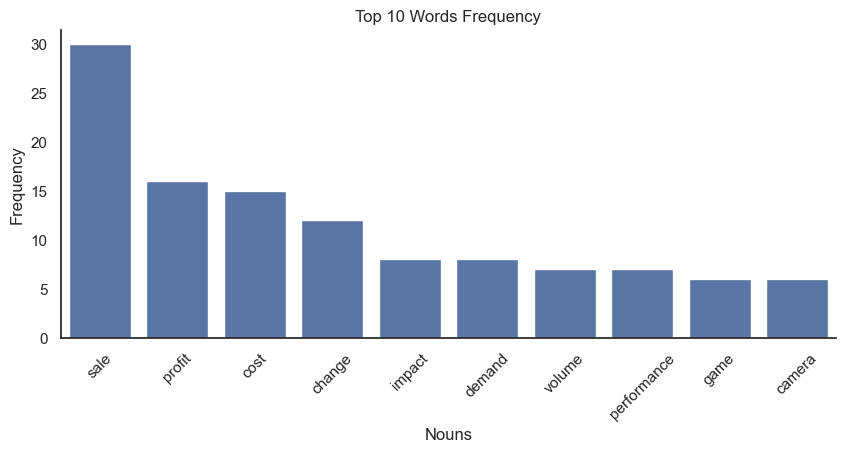

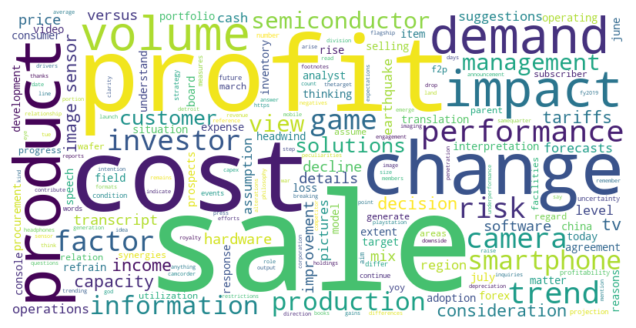


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
        Nouns  Frequency
9   question         23
25      sale         20
28    profit         19
48      year         18
76      game         15


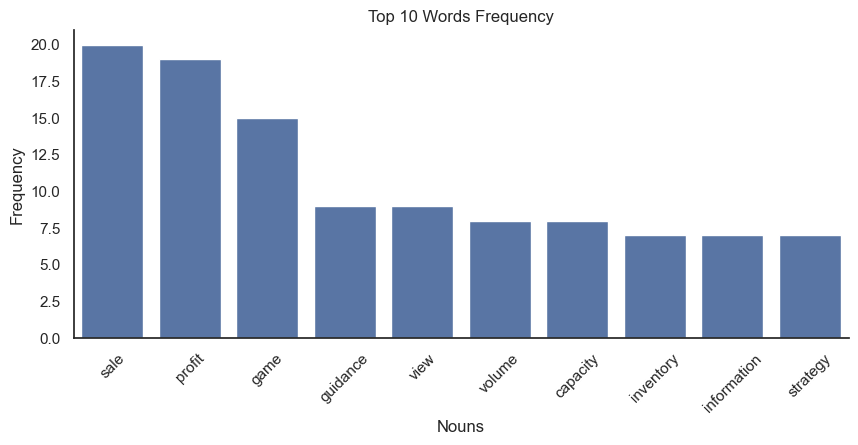

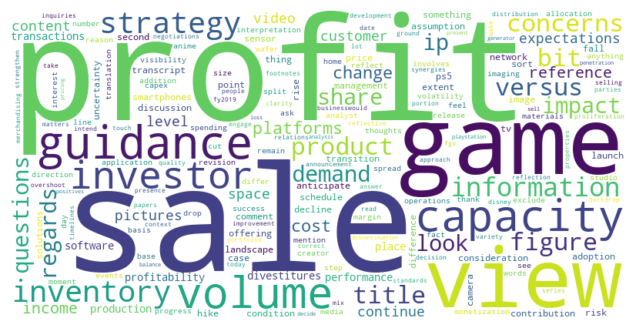


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
13  quarter         29
23  segment         28
71     game         16
22       ss         13
50     plan         13


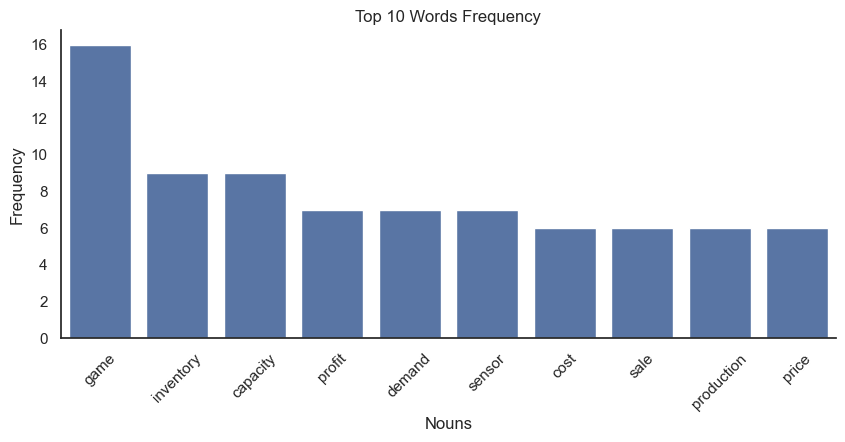

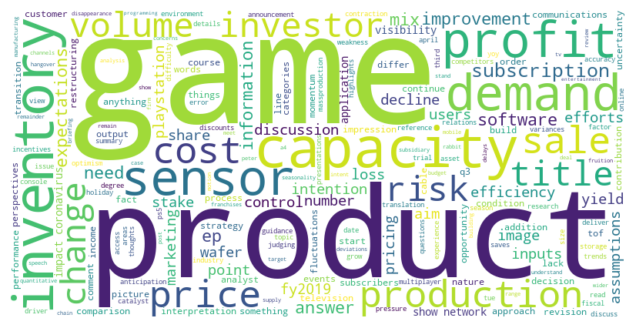


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
6    statement         11
18     segment         10
25      fy2020          9
63        plan          9
162   capacity          9


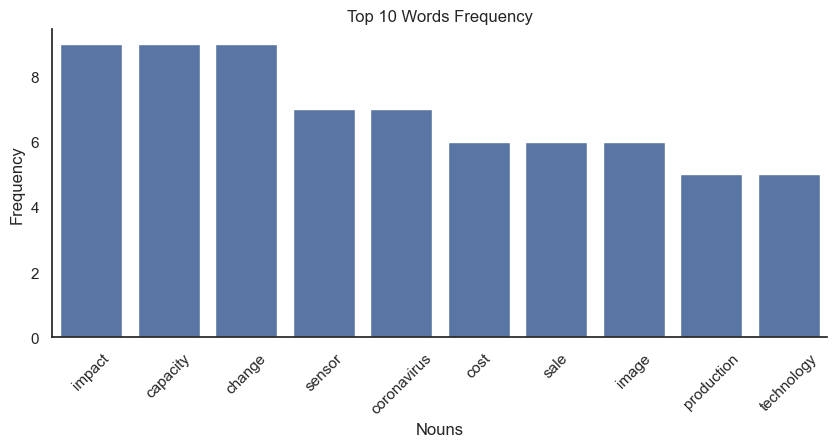

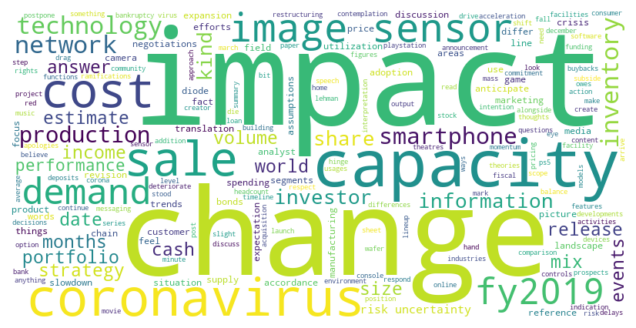


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
14    quarter         19
94        yen         17
21    segment         12
8   statement         10
26     demand          9


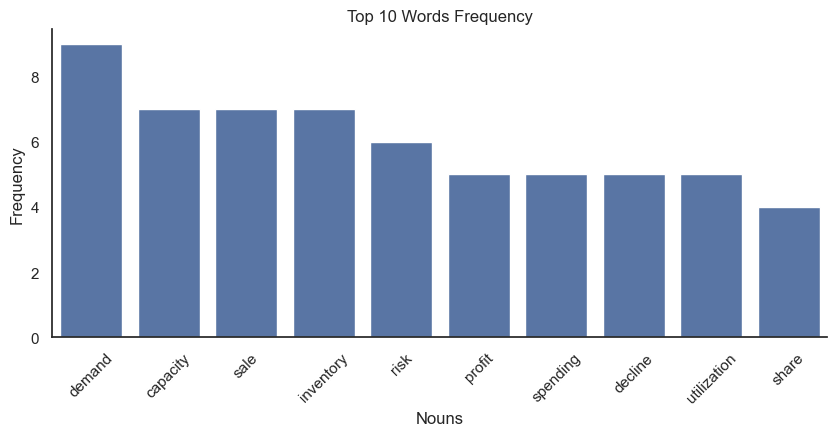

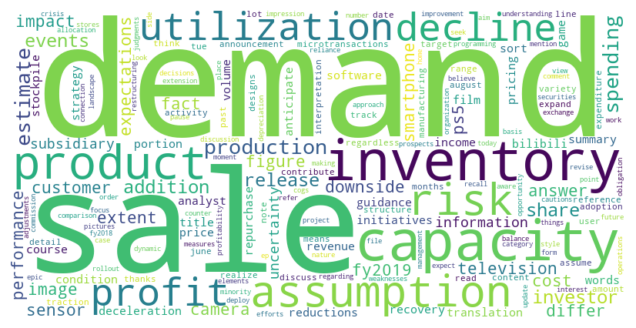


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
18    segment         22
12    quarter         12
6   statement         11
52   business         10
29   customer          9


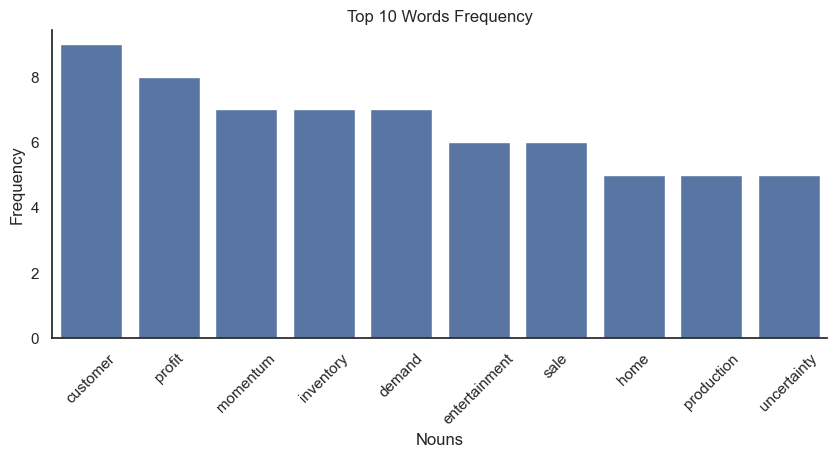

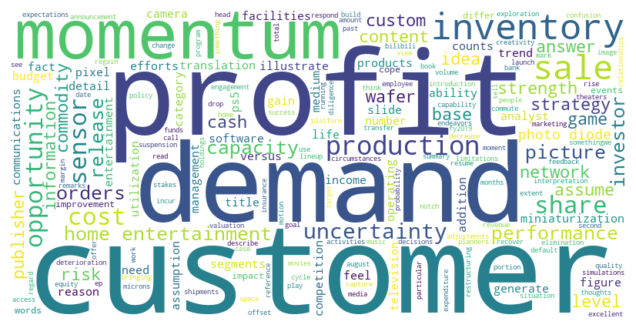


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
86    business         17
18     segment         14
6    statement         13
101     margin         10
75      profit          8


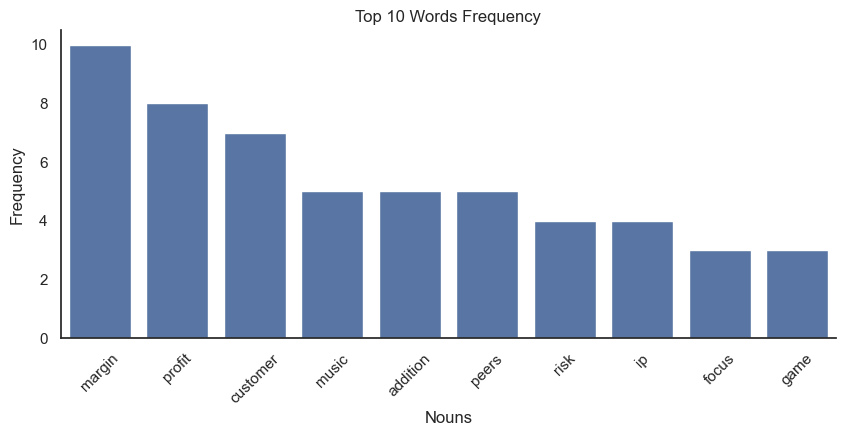

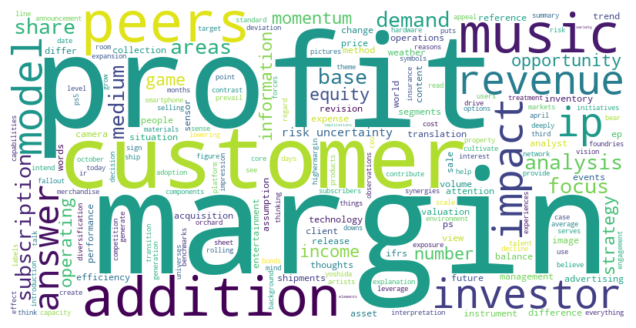


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
19     segment         14
27    capacity         13
7    statement         11
100     profit         10
66         yen         10


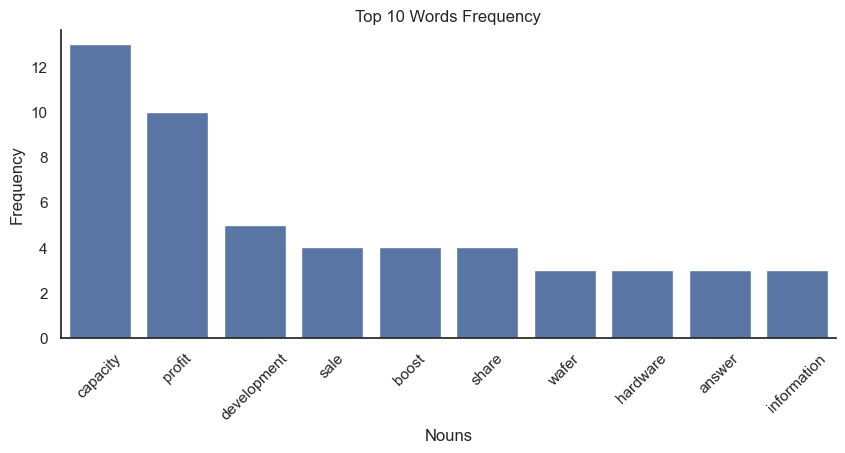

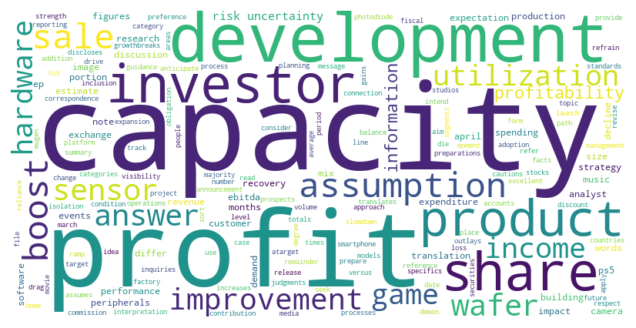


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         17
7   statement         11
20      price          9
28     market          8
18    segment          7


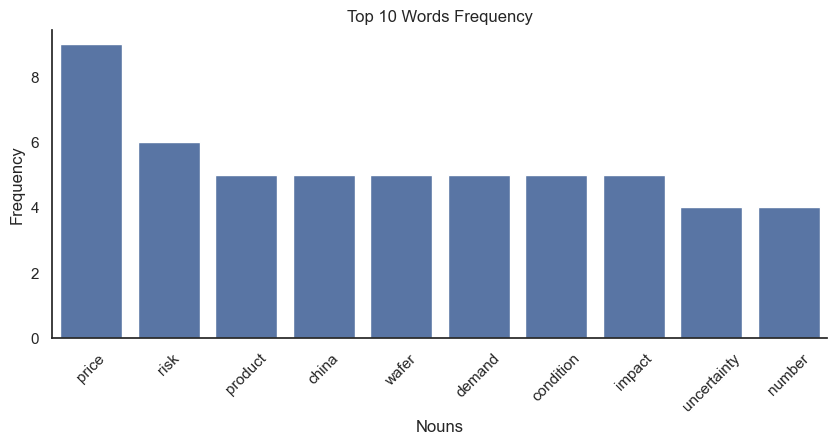

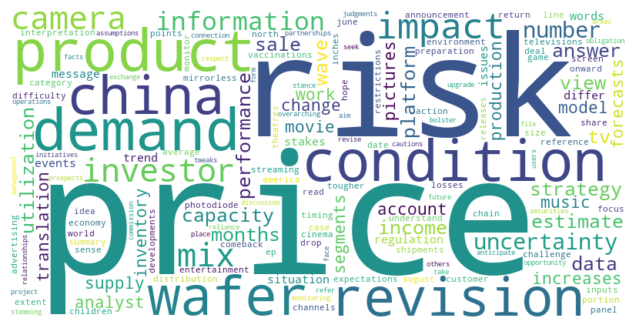


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
113  investment         12
13      quarter         12
7     statement         11
20      segment          8
171      market          7


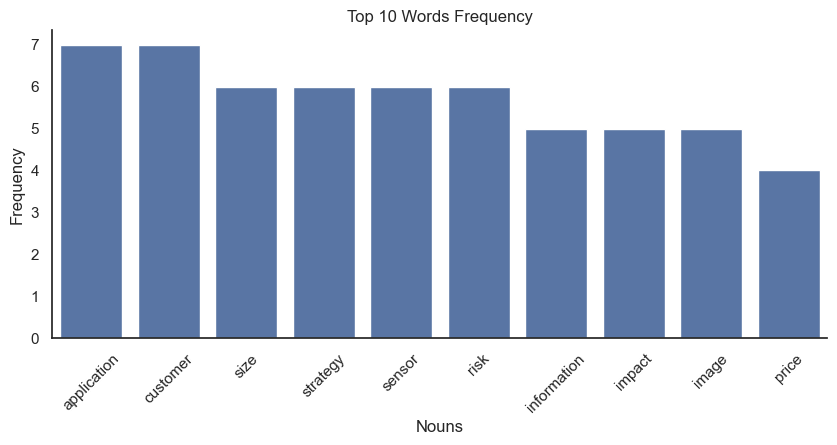

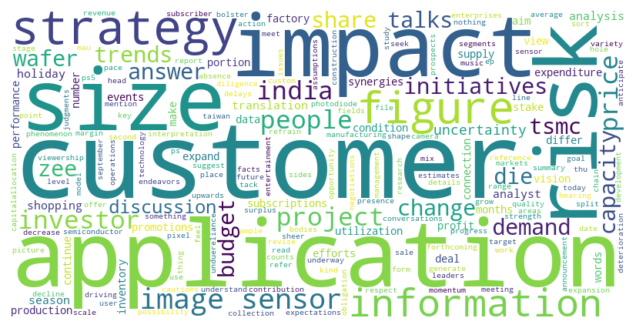


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
6     statement         11
105   inventory         11
80         sony          9
201      bungie          9
68   investment          8


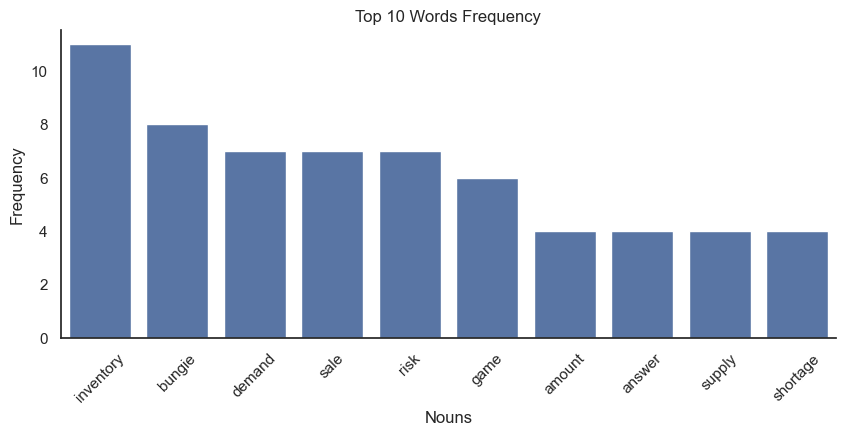

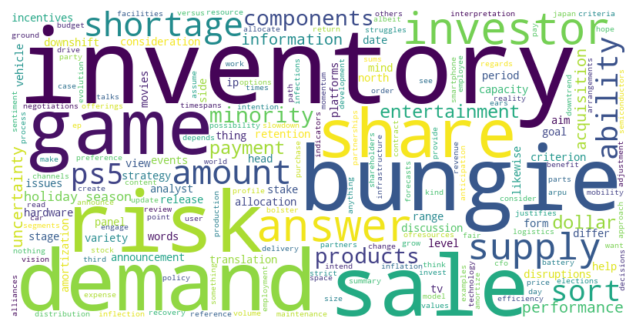


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
7   statement         11
20    segment         10
28     fy2022          9
55  inventory          8
56     levels          7


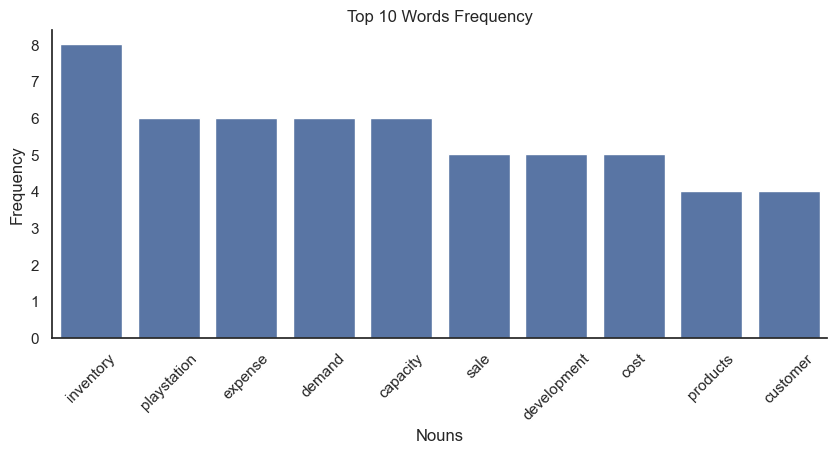

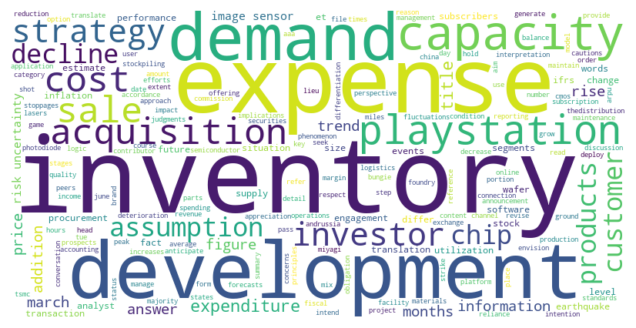


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
45  inventory         19
14    quarter         16
20    segment         13
24       sale         12
54   forecast         11


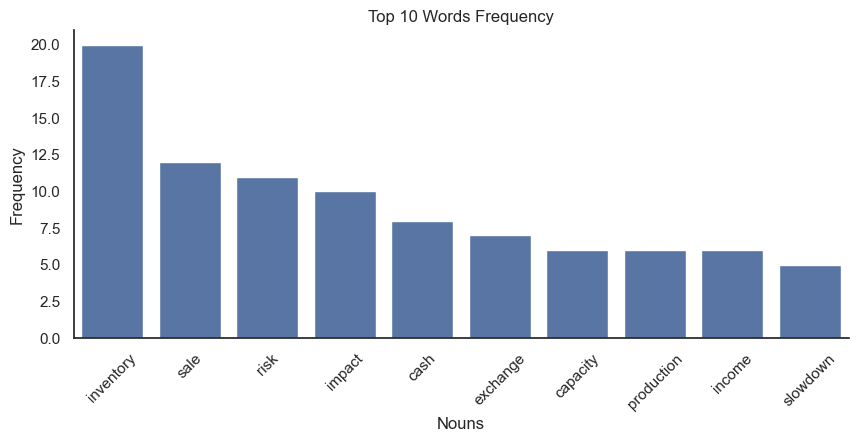

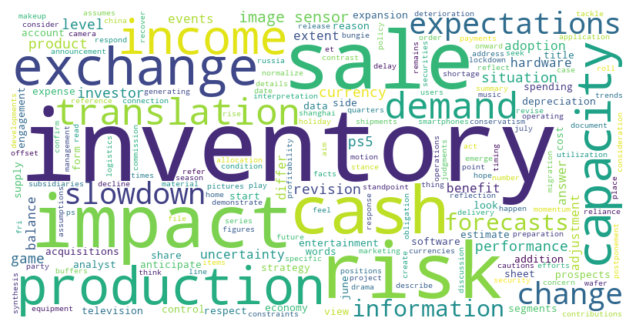


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         12
7   statement         11
18    segment          9
45       plan          7
67      title          7


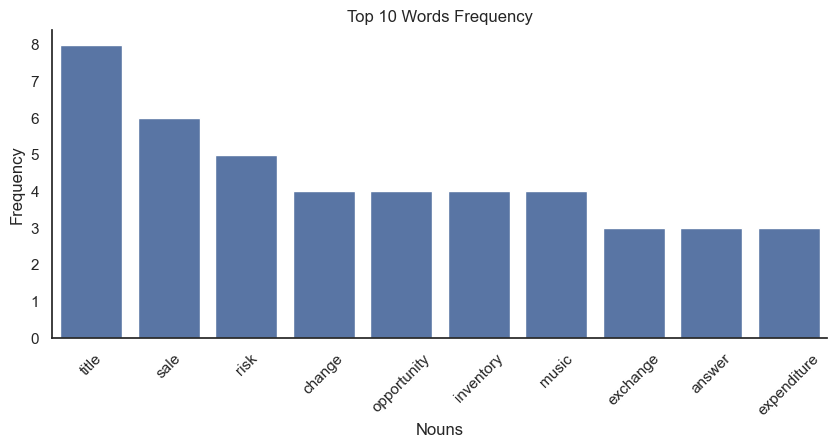

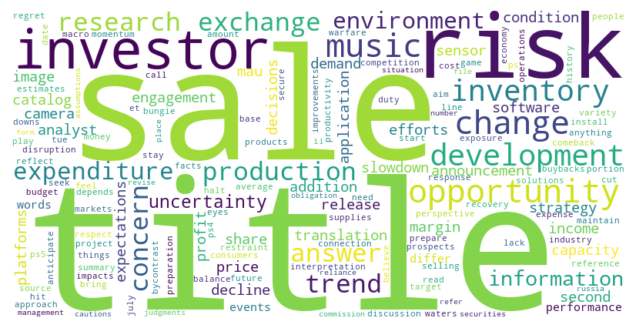


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         12
7   statement         11
12    results          6
20    segment          6
21      units          5


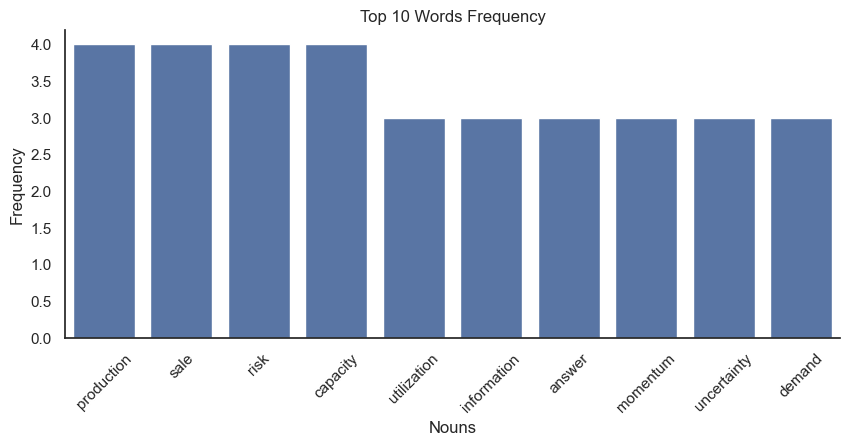

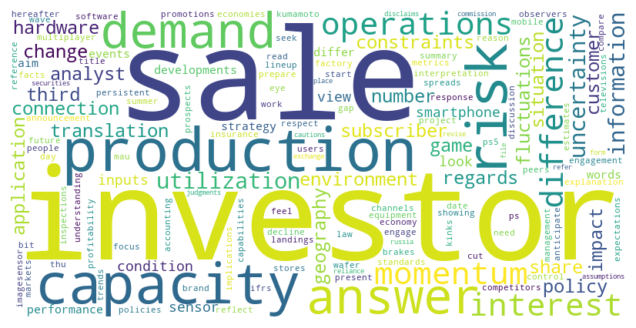


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
54       sale         14
87  inventory         13
45    expense         11
20    segment         11
8   statement         11


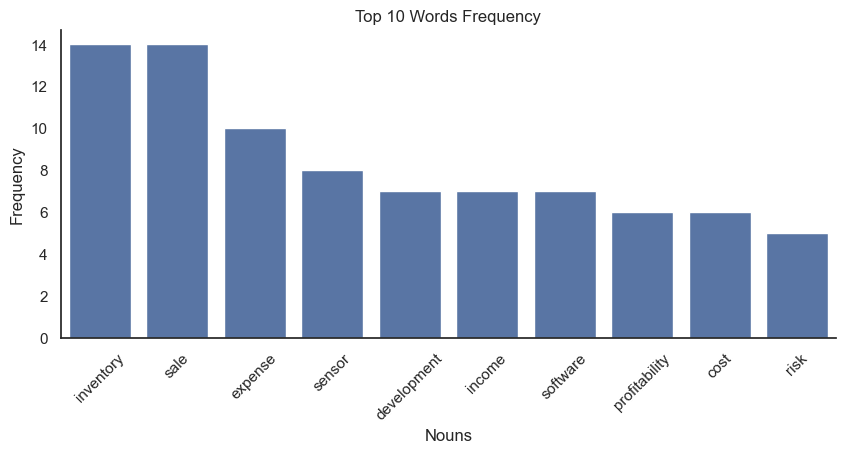

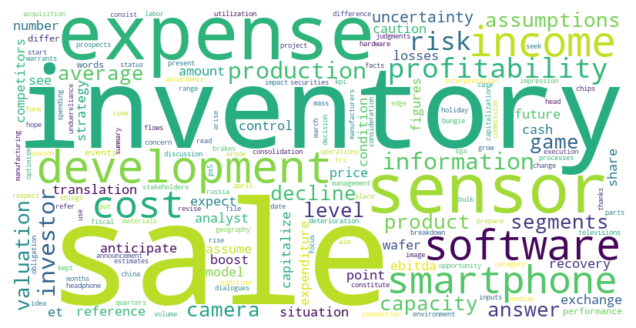


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 23q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
23       sale         22
80  inventory         13
5   statement         11
44        yen         11
17    segment         10


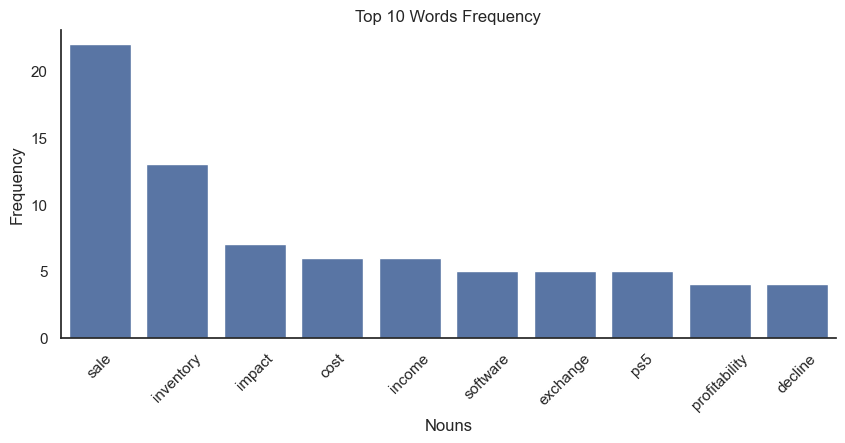

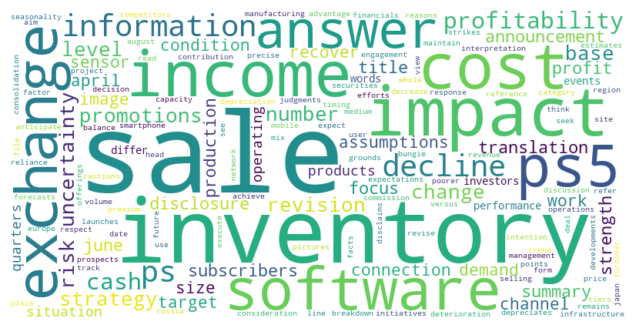


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 23q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
18     segment         17
21        year         15
114       sale         11
70       title         11
5    statement         11


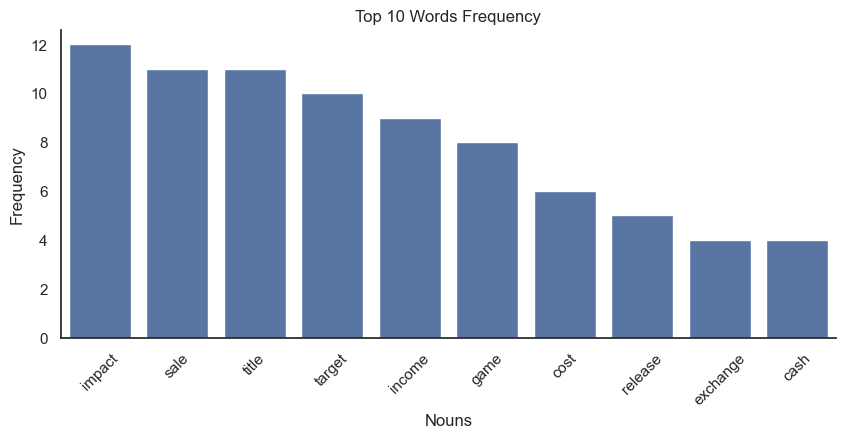

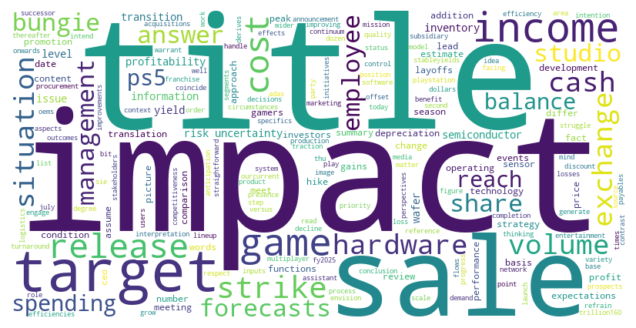

In [31]:
comments_dict = {file_path.name.replace(".pdf",""):tas.pdf_to_text(file_path) for file_path in files_path}
for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    for original, replacement in replacement_mapping.items():  #복수형 단수로 변경
        comment = comment.replace(original, replacement)
        
    tas.set_comments([comment], [])
    print(f"top 5 words before cleaning: \n {tas.df_word_freq.sort_values(by='Frequency', ascending=False).head(5)}")

    tas.set_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()

### SONY group Q&A Summary (Corporate Strategy Meeting) 2021~2023
https://www.sony.com/en/SonyInfo/IR/library/presen/strategy/archive.html

In [9]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path # SONY group earing call QnA 2019~2023

[WindowsPath('input/qa_E_2020_May_19.pdf'),
 WindowsPath('input/qa_E_2021_May_26.pdf'),
 WindowsPath('input/qa_E_2022_May_18.pdf'),
 WindowsPath('input/qa_E_2023_May_18.pdf')]

In [27]:
cleaning_words = [  #사전 필터링하는 단
    "half","fy2021","fy2020", "month","way", "input","earnings",
    "forecast","please","terms","market","g","ns", "unit","assets",
    "fy2022","levels","q","fy2023","numbers","result","units",
    "factors","costs","ss","q1","part",'segment', 'quarter', 
    'statements', 'business', 'question', 'yen', 'year', 'sony', 'results',
    "end","q2","questioner",
    "session","fy2024",
    # "sale","plan","capacity","growth","demand",
    "outlook","increase","investment",
    "example","rate","flow","time","a2","a1","sfh","r","dtc", "statement",
    "plan", "tax", "value", "term","capital", "growth","company","group", "service"
]

replacement_mapping = {  #사전에 교체하는 단어
    "games": "game",
    "plans": "plan",
    "sensors": "sensor",
    "changes": "change",
    "risks": "risk",
    "services": "service",
    "margins": "margin",
    "profits": "profit",
    "wafers": "wafer",
    "sizes": "size",
    "customers": "customer",
    "applications": "application",
    "shortages": "shortage",
    "expenses": "expense",
    "sales":"sale",
    "titles":"title",
    "conditions":"condition",
    "prices":"price",
    "investments":"investment",
    "rates":"rate",
    "inventories":"inventory",
    "uncertainties":"uncertainty",
    "cameras":"camera",
    "opportunities":"opportunity",
    "volumes":"volume",
    "costs":"cost",
    "technologies":"technology",
    "employees":"employee",
    "companies":"company",
    "creators":"creator",
    "challenges":"challenge",
    "businesses":"business",
    "years":"year",
    "electronics":"electronic",
    "strategies":"strategy",
    "electronics":"electronic",
    "targets":"target",
    "statements":"statement"
}


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2020_May_19 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
23    business         20
6    statement         11
24       group         10
22        sony         10
109       plan          8


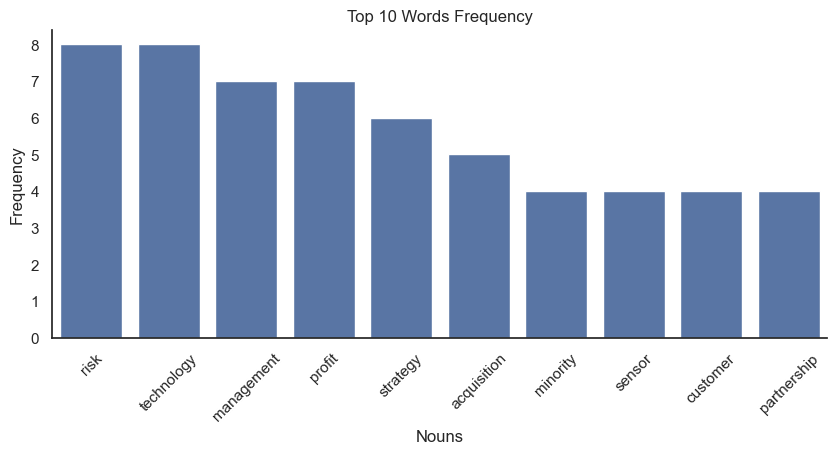

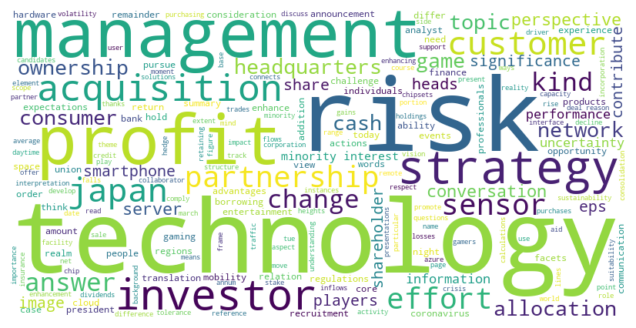


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2021_May_26 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
200  technology         16
5     statement         11
38         sony         11
85     business          9
81      company          9


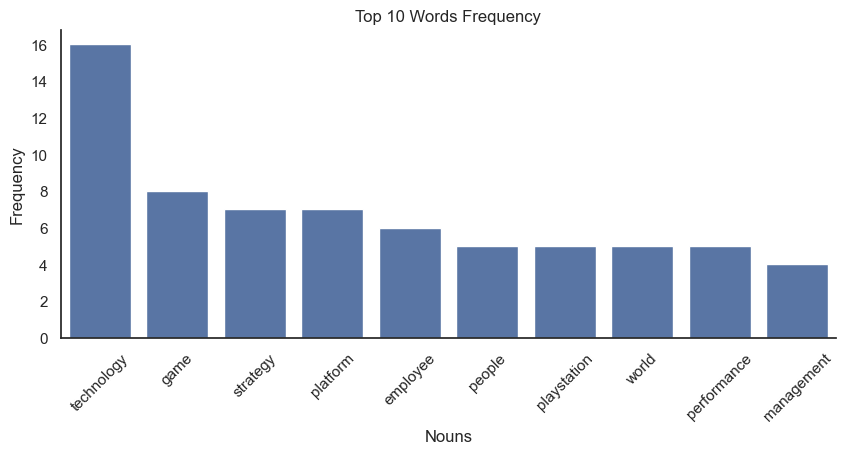

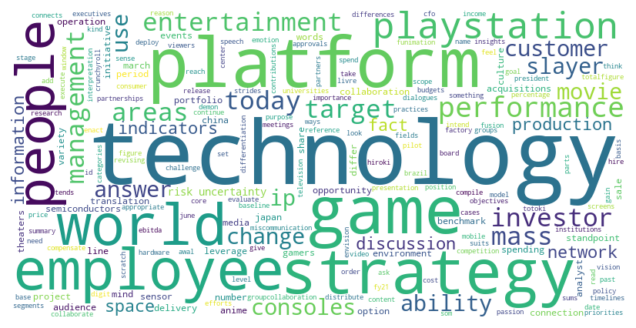


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2022_May_18 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
80     business         21
115  investment         15
5     statement         13
28         sony         11
21         game         10


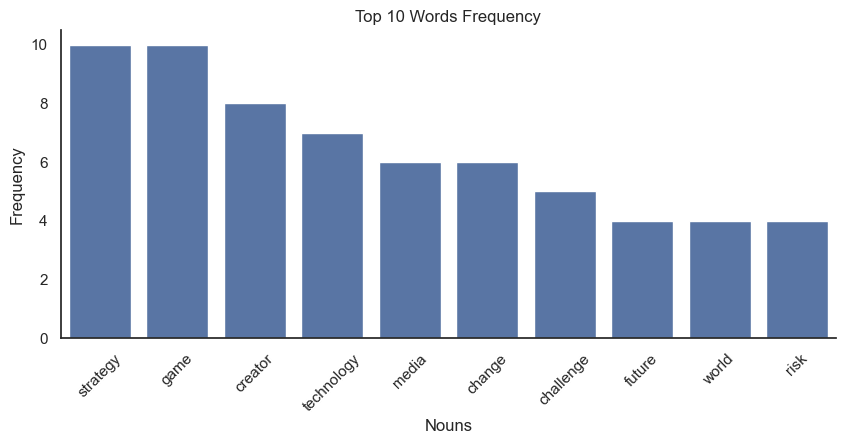

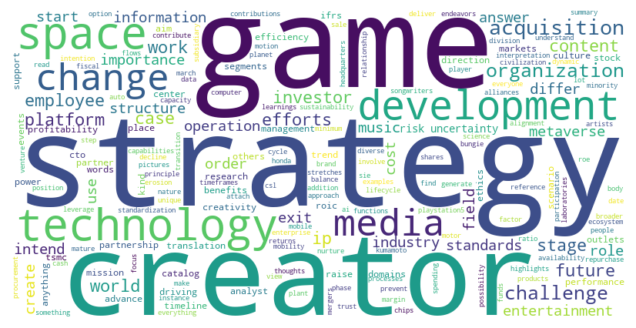


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2023_May_18 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
19   business         62
10       year         19
39     growth         18
107      plan         17
43       sony         16


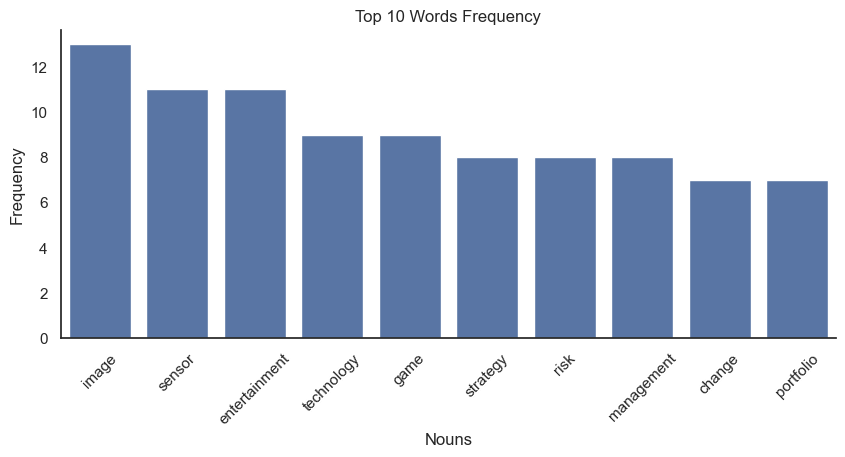

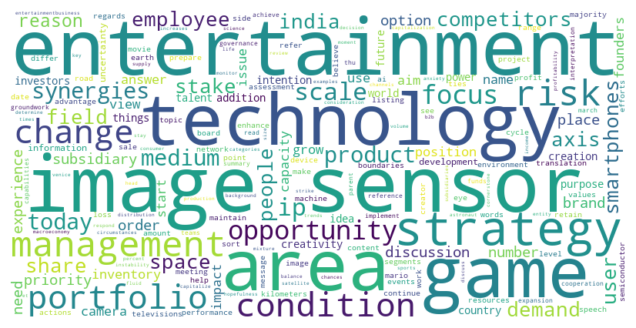

In [28]:
comments_dict = {file_path.name.replace(".pdf",""):tas.pdf_to_text(file_path) for file_path in files_path}
for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    for original, replacement in replacement_mapping.items():  #복수형 단수로 변경
        comment = comment.replace(original, replacement)
        
    tas.set_comments([comment], [])
    print(f"top 5 words before cleaning: \n {tas.df_word_freq.sort_values(by='Frequency', ascending=False).head(5)}")

    tas.set_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()

### 2021
1. 소니는 PlayStation과 Funimation의 성공적인 통합을 바탕으로 애니메이션 플랫폼을 성공적으로 구축하고, 이를 통해 게이머들과 강력한 연결을 형성하고 있는 것으로 보임.

2. 2조 엔의 전략적 투자에서 IP, DTC, 기술에 대한 투자 중에서도 소니는 게임 기술과 이미지 센서 기술의 중요성을 강조하며, 가상 사회적 세계를 창조하는 데 필수적인 기술적 측면에 집중하고 있습니다. 또한, AI, 클라우드 게임, 의료 데이터 등 다양한 기술 분야에 투자하여 포트폴리오를 강화하고자 함

I
```
Q2: PlayStation’s fusion of hardware and IP has proven a winning model for you, but it seems like an anime platform would put you in head-to-head competition with other over-the-top (OTT) media services. 
What kind of winning formulas or differentiation strategies do you envision that will enable your anime platform to attract a mass audience?
A2: We have seen that anime tends to resonate extremely strongly with gamers. 
We have made Funimation accessible via PlayStation, and this tie-up is going very well, as is apparent from the growth we have seen in user numbers. 
```

```
Q1: You cited IP, DTC and technology as areas to which you will allocate your 2 trillion yen in strategic investment. 
If there are any areas or categories where you feel that you are lacking in terms of achieving your Purpose, or if you have an order of priority in mind for your investments, please let us know.
A1: IP, DTC and technology are all important, so I would not cite any particular initiative among them, but I would say that I think technology is important from a variety of standpoints, including both creating and delivering content. 
Sony is No.1 in the world in both consoles* and in CMOS image sensors, so we believe leveraging our game technology and our sensor technology will be key. 
As I mentioned in my speech, game technologies such as ray tracing and game engines are becoming content-creation technologies. 
If we were to create virtual social worlds going forward, what I have been discussing with CTO, Toru Katsumoto is that they should be seamless extensions of environments created by using our technology for capturing the real world. 
We use the expression “entertainment goes social” internally. Social media and entertainment have become inseparable, and we are always questioning ourselves about whether we are challenging ourselves sufficiently in the social space beyond mobile. 
From the technology perspective, there are production technologies and delivery technologies. 
On the network or delivery side, our past acquisitions have included Gaikai (now CGI, cloud gaming) at SIE, providing cloud game and Nevion at former SIPS, providing network solutions for broadcasters. 
In the healthcare space, we have acquired eSATURNUS, which makes medical data accessible over networks at healthcare facilities.
AI is also going to be extremely important. 
For example, we have invested in Cogitai and their engineers now work for Sony AI, and we have also invested in Midokura and Cinnamon AI. 
Other investments have included Audiokinetic, which strives to create immersive experiences. We hope to seek further opportunities to invest in technologies that reinforce or complement our portfolio in this way. 
```

### 2022

1. 소니의 히트 컨텐츠 제작 성공은 글로벌 창작자들과 가장 사랑받는 브랜드로 성장하고자 하는 전략과 창작자, 아티스트, 작곡가를 지원하는 노력에 기인. 
2. 소니는 모바일 공간에서 Lasengle 인수와 Scopely, Inc. 주식 인수를 통해 개발 및 운영 능력을 강화하며, 장기적으로 IP를 모바일에서 효과적으로 활용하고자 함.  
3. 미국 엔터테인먼트 산업 동향에 대한 소니의 접근은 게임 업계에 가치를 제공하고 창작자 중심으로 관심의 공동체를 형성하는 것에 중점을 두며, IP에 대한 투자를 강조하고자 함.

```
Q1: I understand that you now find yourselves able to consistently produce hit music, motion pictures, and games. 
I suppose that that is due in part to the mergers and acquisitions you have undertaken, but what would you say the greatest factor is? Also, what strategy will you adopt to ensure that this trend continues?
A1: I want to make Sony the brand that is the most loved by or the closest to creators around the world since it is the creators that create “Kando.” Advances in technology may change the media in which they work, but it remains people who create Kando. 
To adapt to the change of the media, we will try to address the DTC space by doing our solid best where we can while also adopting a partnership strategy. There is also the question of how we engage with creators. 
In the case of music, for example, the overarching direction is to support creators, artists, and songwriters, and such direction is also the case for the entire company. 
One of our recent acquisitions, AWAL, supports independent artists and brings their creativity to the world. That’s what I hope to become part of our corporate culture. 
```

```
Q1: I would like to ask about your social media efforts in the entertainment business. 
I believe you will start to see benefits from your acquisition of Bungie and other moves going forward, but could you speak to what you have done to step up your mobile efforts over the past year, as well as to what benefits or learnings you have gained, if any? Also, what role do you see for mobile in Metaverse spaces?
A1: I believe that the fiscal year ended March 31, 2022 included two highlights for us in the mobile space. The first is that we acquired what is now Lasengle, formerly the mobile game development and operation division of Delightworks, which was responsible for the development and operation of the mobile game Fate/Grand Order. 
We hope that that will add to our development and operational capabilities. The other highlight was that we acquired preferred stocks of Scopely, Inc. as part of the consideration for the transfer of GSN Games. 
They provide a business whose nature is close to live game services, and run their business based on data, studying player trends in order to establish how to keep them enjoying games longer, and we feel we have a lot to learn from them. 
In addition, regarding SIE, we want to leverage our IP in mobile spaces over the long term, and we intend to steadily deliver on that
```

```
Q1: There have been many developments in the entertainment industry in the U.S. since the start of the year, including the announcement of a huge investment of more than 8 trillion yen in the game industry and a major OTT platform losing subscribers. 
How do you view these developments? 
Also, when you think about strengthening your IP or expanding your platforms, what sort of risks do you see, and what kind of timelines do you think you have to base your efforts on?

A1: When thinking about M&A, the question of utmost importance is whether our investment will enable us to provide greater value for gamers or for game creators, rather than to expand our scale in the market, if what we are talking about is games. Platforms are important, but we are more interested in “Communities of Interest,” what motivates each of them, so we are not focused on the
concept of a single platform. 
The media has changed significantly since things have moved online.
We need to adapt ourselves accordingly, but we do not think the content that human creativity gives rise to will change that much. 
In the past, the media outlets chose what content they provided, but we are gradually beginning to see the content and its creators picking which media outlets they place themselves on. 
We therefore want to be sure we maintain our status as a company that is getting closer to creators.
We nonetheless place greater investment priority on IPs than on DTC services. 
No matter how the world changes, we do not think a business can succeed without the power of content. 
As such, we intend to continue to ask ourselves what we can do to enhance our power of content creation. 
```

### 2023
1. 소니는 글로벌 시장에서 경쟁력 강화를 위해 이미지 센서와 엔터테인먼트에 대한 투자를 확대하며, 지난 3년간 총 1.8조 엔의 전략적 투자를 진행.
2. ET&S 비즈니스에서는 텔레비전과 스마트폰에서 수익성을 강조하면서 카메라 및 성장 중심 사업에 집중하며, 창의성과 수익성을 높일 것으로 계획.
3. 소니가 인도에 주목한 이유는 Zee Entertainment와의 합병 계획과 함께, 인도의 큰 인구와 엔터테인먼트 분야의 성장 기회에 기인하며, 인도를 향한 엔터테인먼트 사업 확장이 중요.
4. 소니는 AI 분야에서의 강점을 갖추어 Gran Turismo Sophy와 같은 기술을 활용하여 창의성을 증진시키며, AI를 창작자들에게 유용한 도구로 활용할 계획.
5. 엔터테인먼트 비즈니스에서 소니는 다양한 플랫폼에서 게임을 이용하고자 하며, 플레이스테이션 사용자 성장을 넘어 10억 명의 세계적 사용자 규모에 다가가는 계획.
6. 콘텐츠 IP에 대한 투자를 최우선으로 두며, 지속 가능한 성장을 위해 게임, 음악, 애니메이션 분야에 중점을 두고 있으며, 캐릭터 IP의 지속적 성장을 통해 투자할 것.

```
Q: You said that the image sensor and entertainment businesses require investment on an entirely different scale than what they have before. Could you explain the reason and background for this?
What is the investment strategy of these businesses going forward?

A: In the global market, we are up against many competitors operating with enormous scale. Sony’s market capitalization is the size that it is after taking all six of our main business segments into consideration, but if we consider each business individually, we are lacking in scale compared to our global competitors. We are constantly mindful of this, and in order to establish our position, we need not only to continue investing but also to increase the level of our investment in keeping with our businesses’ growth in scale. Over the past three years, Sony has made a total of 1.8-trillion-yen worth of strategic investments, including our investments this fiscal year, and capital expenditure mainly in the image sensor business has totaled approximately 2 trillion yen. However, we have to raise the level further as we head into our 5th Mid-Range Plan, partly because of M&A opportunities
in multiple fields. We want to continue investing in the areas of content IP, DTC, and technology going forward.
```

```
Q2: Within the ET&S business, there is also an increasing number of product categories facing tough conditions. What will be the cornerstone of the segment going forward?

A2: Our outlook for the current fiscal year is that demand will be somewhat weak, partly because some demand was pulled forward by the pandemic. In televisions and smartphones, we do not have a bullish plan and aim to emphasize profitability. Cameras meanwhile remain strong, and since the number of people going out is increasing and pent-up demand so far is growing following the end of the pandemic, we intend to make sure we have the supply to capitalize on that. While camera demand remains firm, we plan to expand our growth axis businesses, including sports technology, life science, and B2B network services.
One of our key messages today is our focus on creativity, in both our device and content businesses.
We intend to focus on input and creation when it comes to our ET&S products, too. Televisions and smartphones will remain important for us, but they will not be areas in which we intend to pursue sales volume. We will place a greater focus on the creation side with products such as our Alpha and Venice cameras, virtual production, and Hawk-Eye.
```

```
Q1: What was the reason for highlighting India at this time?

A1: This was largely influenced by our plans to merge with Zee Entertainment during the first half of this fiscal year. In addition, India is expected to become the most populous country in the world soon, and I believe it holds great potential. N.P. Singh has worked at Sony for 24 years, and the key phrase of his speech today was “opportunity destination.” In the field of entertainment in particular, there are many growth opportunities. On top of this, we see India as a land of creativity. It has been the most prolific producer of movies every year since 2005. It is also a youthful country, with half of the population aged 30 or under, and we believe it offers tremendous growth opportunities in the areas of animation and games going forward.
In India, our business began in electronics and expanded into entertainment, but we suspect the Sony brand is currently most closely associated with entertainment. India is an enormously attractive market for us as we work to expand our entertainment business. Indicators such as the country’s PMI (Purchasing Manager’s Index) are also at a 10-year high, and India’s growth rate may well be the highest in Asia right now. So, it was also from a standpoint of capitalizing on these external environment tailwinds that we chose to talk about India today. 
```

```
Q2: What is Sony’s edge in AI? How do you intend to use AI within your growth fields to differentiate yourself?

A2: I believe one example of our strength in the field is that we are already using AI, including our Gran Turismo Sophy agent featured in our presentation, to enhance the gaming experience for our players. Our basic approach is to focus on creativity and be the brand chosen by creators, and we see AI as a powerful tool that can help creators do what they do. As such, we intend to continue to advance our R&D efforts in the field. We started working with machine learning long before AI became the hot topic it is today, so I believe we have an advantage in what we have built up through our efforts working on projects such as Eye AF and Flow Machines. 
```

```
Q2: You say that you intend to increase the number of active users in your entertainment business.
Are you expecting to accelerate beyond the pace of PlayStation user growth that you have seen to date and experience a spurt that brings you close to 1 billion users globally?

A2: We think that offering first-party games that users enjoy, including live-service games, is an effective means of increasing our active user numbers. In addition, we believe that making our games available not only on our game consoles but also for PCs and eventually mobile devices will also allow us to expand our user base.
```

```
Q2: I understand that your priority in investing has been on content IP, DTC, and technology, with content IP topping that list. Do you see that changing over the next few years? Also, do you have a priority ranking in terms of business areas in which to invest?

A2: There will not be much change in our investment priorities. Content IP remains our top priority in terms of strategic investments. In terms of business areas in which to invest, various opportunities are available, so we are prioritizing games, music, and anime.
I recently saw the Super Mario movie. That is an amazing piece of IP and content-driven entertainment. It has been three decades since I played Super Mario games intensively, but I believe beloved character IP can go on living for thirty years, fifty years, or even a century. I want to invest in areas like that in order to achieve sustainable growth. In addition, Kando is inclusive rather than exclusive, which is another reason I think that it has the potential for growth. I believe that entertainment has the power to bring people together.
```

---
이하 테스트 중

---

In [32]:
for excel_file in excel_files:
    file_name=excel_file.name.split(".")[0]
    output_file_path = output_folder/file_name
    
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■[{file_name}]■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded

    #text 읽기
    comments = [sentence for sentence in df_uploaded["sentences"]]
    tas.get_comments(comments)
    tas.save_df_freq_as_excel(output_file_path, file_name)

    #그래프 만들기
    tas.plot_freq()
    tas.plot_wordcloud()

- colab에서 파일 받기

In [ ]:
!zip -r /content/results_text.zip /content/results_text/
files.download('/content/results_text.zip')

## sentgpt: Fine tune 필요

### GPT setting
- [GPT model info](https://platform.openai.com/docs/models/continuous-model-upgrades)

In [14]:
API_KEY = 
gpt_model="gpt-3.5-turbo-1106"

In [8]:
stm = SentiGPT(api_key=API_KEY, gpt_model=gpt_model)

In [10]:
for excel_file in excel_files:
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded
    
    # GPT 분석
    sentences_list = [sentence for sentence in df_sentences["sentences"]]  # 리스트로 변환
    keywords_list=["brightness", "color", "contrast", "reflection", "viewing angle"]
    analyzed_results_df = stm.analyze_sentences(sentences_list, keywords_list)
    
    # 분석 파일 저장
    file_name=excel_file_path.name.split(".")[0]
    output_file_path = output_folder/file_name
 
    if not output_file_path.exists():
        output_file_path.mkdir(parents=True, exist_ok=True)
    analyzed_results_df.to_csv(output_file_path / f"analyzed_results_{file_name}.csv", index=False, encoding='utf-8')
    
    #그래프 만들기
    # df_analyzed_results = analyzed_results_df - 5  #그래프 범위 조정
    print(f"{file_name}, Plot")
    stm.plot_hist_all(output_folder=output_file_path, file_name=file_name)
    stm.plot_hist_each(output_folder=output_file_path, file_name=file_name)

---